# Problem Statement

Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics. Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

# Load the dataset

In [1]:
import pandas as pd

movie_ds = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='latin-1')
print("Missing Values:\n",movie_ds.isna().sum())
movie_ds.head()

Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Processing and EDA

In [2]:
movie_ds.dropna(inplace=True)
duplicate_movies = movie_ds[movie_ds.duplicated(subset = ['Name', 'Year'], keep = False)]
print("Below are the duplicate entries acc. to Name and Year:")
duplicate_movies.head()

movie_ds.drop_duplicates(subset=['Name', 'Year'], inplace=True)
movie_ds.shape

movie_ds['Year'] = movie_ds['Year'].str.replace(r'(', '').str.replace(r')', '')
movie_ds['Duration'] = movie_ds['Duration'].str.replace(r' min', '')
movie_ds['Votes'] = movie_ds['Votes'].str.replace(',', '')

movie_ds['Year'] = movie_ds['Year'].astype(float)
movie_ds['Votes'] = movie_ds['Votes'].astype(float)
movie_ds['Duration'] = movie_ds['Duration'].astype(float)

movie_ds.head()

Below are the duplicate entries acc. to Name and Year:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Plotting data

Summary statistics:
              Year    Duration       Rating         Votes
count  5657.000000  5657.00000  5657.000000    5657.00000
mean   1996.254198   133.44087     5.897967    2698.59802
std      19.729583    25.32374     1.381035   13653.82378
min    1931.000000    21.00000     1.100000       5.00000
25%    1983.000000   119.00000     5.000000      30.00000
50%    2002.000000   135.00000     6.100000     131.00000
75%    2013.000000   150.00000     6.900000     923.00000
max    2021.000000   321.00000    10.000000  591417.00000


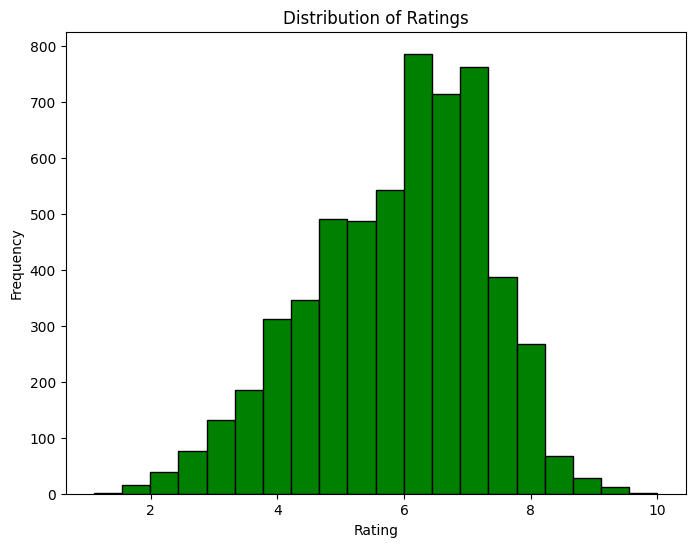

In [3]:
import matplotlib.pyplot as plt

# Summary statistics
print("Summary statistics:")
print(movie_ds.describe())

# Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(movie_ds['Rating'], bins=20, color='green', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Model training

In [10]:
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Split the data into train and test sets
X = movie_ds[['Year', 'Duration', 'Votes']]
y = movie_ds['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Initialize models
models = {
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Print model performance
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print()

Shape of X_train: (3959, 3)
Shape of X_test: (1698, 3)
Shape of y_train: (3959,)
Shape of y_test: (1698,)
KNN:
Mean Squared Error: 1.6510725559481745

Linear Regression:
Mean Squared Error: 1.7800720388018452

Decision Tree:
Mean Squared Error: 2.605619846878681

Random Forest:
Mean Squared Error: 1.5254258459634888



# Model analysis

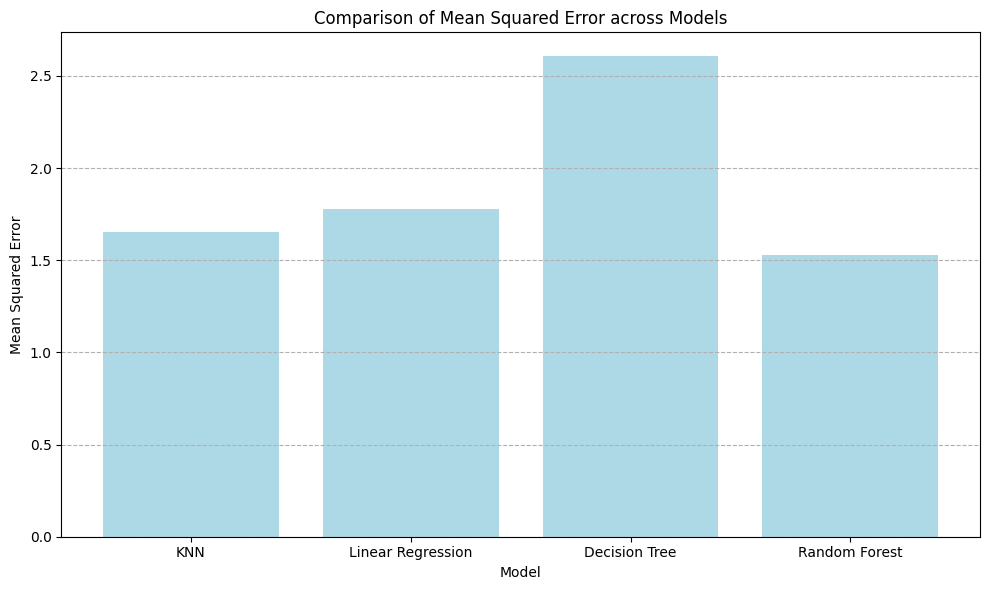

In [13]:
# Store the mean squared errors of each model
mean_squared_errors = {
    'KNN': 1.6510725559481745,
    'Linear Regression': 1.7800720388018452,
    'Decision Tree': 2.605619846878681,
    'Random Forest': 1.5254258459634888
}

# Plot the mean squared errors
plt.figure(figsize=(10, 6))
plt.bar(mean_squared_errors.keys(), mean_squared_errors.values(), color='lightblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error across Models')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Model Testing and Evaluation

#### The Random Forest model has the lowest mean squared error of 1.5254, indicating that it performs the best among the models evaluated in terms of predicting movie ratings based on the features provided. Therefore, the Random Forest model can be considered the best model for this particular task.

Mean Squared Error: 1.5278544458442533


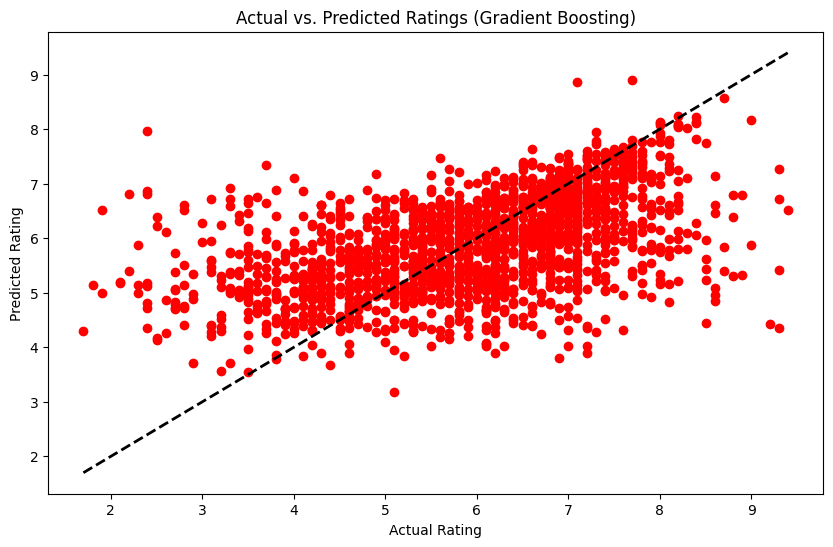

In [14]:
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting model
rfg = RandomForestRegressor()

# Train the model
rfg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings (Gradient Boosting)')
plt.show()